In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
df = pd.read_csv("D:\AI\kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [276]:
column_names = df.columns
for column in column_names:
    print(column + ' - ' + str(df[column].isnull().sum()))

id - 0
date - 0
price - 0
bedrooms - 0
bathrooms - 0
sqft_living - 0
sqft_lot - 0
floors - 0
waterfront - 0
view - 0
condition - 0
grade - 0
sqft_above - 0
sqft_basement - 0
yr_built - 0
yr_renovated - 0
zipcode - 0
lat - 0
long - 0
sqft_living15 - 0
sqft_lot15 - 0


In [277]:
df['sqft_precent'] = (df['sqft_living'] /df['sqft_lot'] )* 100
df=df.drop(['id','date','zipcode','lat','sqft_living15','sqft_lot15','long','condition','grade','waterfront','view'], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_precent
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,20.884956
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,35.487434
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,7.700000
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,39.200000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,20.792079
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,1530,0,2009,0,135.278515
21609,400000.0,4,2.50,2310,5813,2.0,2310,0,2014,0,39.738517
21610,402101.0,2,0.75,1020,1350,2.0,1020,0,2009,0,75.555556
21611,400000.0,3,2.50,1600,2388,2.0,1600,0,2004,0,67.001675


## MultiLinear Regression Without Standardization

In [278]:
model=LinearRegression()  
model.fit(x_train,y_train)  
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.4667176791689609
R squared 0.4996528488387417


In [279]:
y=df['price']
x=df[['bedrooms','sqft_precent','sqft_lot']]
x_train,x_test,y_train,y_test=train_test_split (x,y,test_size=0.2,random_state=30)


## MultiLinear Regression With Standardization


In [280]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_precent
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,20.884956
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,35.487434
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,7.700000
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,39.200000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,20.792079
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,1530,0,2009,0,135.278515
21609,400000.0,4,2.50,2310,5813,2.0,2310,0,2014,0,39.738517
21610,402101.0,2,0.75,1020,1350,2.0,1020,0,2009,0,75.555556
21611,400000.0,3,2.50,1600,2388,2.0,1600,0,2004,0,67.001675


In [281]:
sc_x = StandardScaler()
sc_x = sc_x.fit_transform(df)
sc_x = pd.DataFrame(data= sc_x, columns=["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","sqft_above","sqft_basement","yr_built","yr_renovated","sqft_precent"])

In [282]:
y=sc_x['price']
x=sc_x[['sqft_living','bedrooms','bathrooms']]
x_train,x_test,y_train,y_test=train_test_split (x,y,test_size=0.2,random_state=30)


In [283]:
y

0       -0.866717
1       -0.005688
2       -0.980849
3        0.174090
4       -0.081958
           ...   
21608   -0.490545
21609   -0.381588
21610   -0.375865
21611   -0.381588
21612   -0.585882
Name: price, Length: 21613, dtype: float64

In [284]:
model=LinearRegression()  
model.fit(x_train,y_train)  
predicted=model.predict(x_test)

In [285]:
model=LinearRegression()  
model.fit(x_train,y_train)  
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.4599010605912576
R squared 0.505500751313616


In [286]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_precent
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,20.884956
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,35.487434
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,7.700000
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,39.200000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,20.792079
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,1530,0,2009,0,135.278515
21609,400000.0,4,2.50,2310,5813,2.0,2310,0,2014,0,39.738517
21610,402101.0,2,0.75,1020,1350,2.0,1020,0,2009,0,75.555556
21611,400000.0,3,2.50,1600,2388,2.0,1600,0,2004,0,67.001675


In [296]:
x= sc_x['sqft_living'].values.reshape(-1,1)
y= sc_x["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
x_train_fit = poly.fit_transform(x_train) 
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))


MSE:  0.42851536927114525
R squared:  0.540607836786031


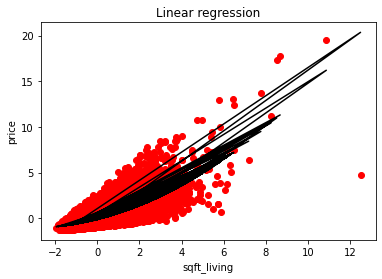

In [297]:
plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 